In [ ]:
# Import required libraries
import os
import pandas as pd
from gensim.models import LdaModel
from gensim.corpora import Dictionary
from gensim.matutils import corpus2dense
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Download the ZIP file for the representation
!gdown --id 1JvhCzH4zgNzdvFu_9C-6yGEc1ELNy9-V -O toxic_gensim_representation.zip

# Unzip the file
import zipfile
with zipfile.ZipFile("toxic_gensim_representation.zip", 'r') as zip_ref:
    zip_ref.extractall()

from gensim.corpora import Dictionary
import joblib

# Load the Gensim dictionary
dictionary = Dictionary.load('toxic_gensim_dictionary.dict')

# Load the Gensim corpus
corpus = joblib.load('toxic_gensim_corpus_bow.joblib')


# Load the saved LDA model
!gdown --id 1R7t0cNJ6lxGD4AEu8IsdEuFAbofaGbco -O toxic_lda_model_k5.zip

# Unzip the saved LDA model
with zipfile.ZipFile("toxic_lda_model_k5.zip", 'r') as zip_ref:
    zip_ref.extractall("toxic_lda_model_k5")

# Load the LDA model
lda_model_k5 = LdaModel.load('toxic_lda_model_k5/toxic_lda_model_k5.gensim')

print("Loaded LDA model and Gensim representation!")

# Load the saved LDA model
!gdown --id 1a16R9y-XKc9CMwixeN1bIrc2rotVRuTs -O toxic_lda_model_k10.zip

# Unzip the saved LDA model
with zipfile.ZipFile("toxic_lda_model_k10.zip", 'r') as zip_ref:
    zip_ref.extractall("toxic_lda_model_k10")

# Load the LDA model
lda_model_k10 = LdaModel.load('toxic_lda_model_k10/toxic_lda_model_k10.gensim')

print("Loaded LDA model and Gensim representation!")



/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1JvhCzH4zgNzdvFu_9C-6yGEc1ELNy9-V
To: /content/toxic_gensim_representation.zip
100% 1.80M/1.80M [00:00<00:00, 133MB/s]
/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1R7t0cNJ6lxGD4AEu8IsdEuFAbofaGbco
To: /content/toxic_lda_model_k5.zip
100% 424k/424k [00:00<00:00, 82.8MB/s]
Loaded LDA model and Gensim representation!
/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anym

In [ ]:
!gdown --id 1RqDDXy9tgVs5fFzKrOwWz2crhWZDk0t_ -O combined_df.zip
import zipfile
with zipfile.ZipFile("combined_df.zip", 'r') as zip_ref:
    zip_ref.extractall()

import pandas as pd
combined_df = pd.read_parquet("combined_df.parquet")
print(f"Combined dataset loaded with shape: {combined_df.shape}")

toxic_df = combined_df[combined_df['is_toxic'] == 1].reset_index(drop=True)
print(f"Toxic dataset shape: {toxic_df.shape}")


/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1RqDDXy9tgVs5fFzKrOwWz2crhWZDk0t_
From (redirected): https://drive.google.com/uc?id=1RqDDXy9tgVs5fFzKrOwWz2crhWZDk0t_&confirm=t&uuid=1527b0e3-fa64-4721-bd07-955749da59e1
To: /content/combined_df.zip
100% 129M/129M [00:01<00:00, 105MB/s]
Combined dataset loaded with shape: (223549, 13)
Toxic dataset shape: (22468, 13)


In [ ]:
categories = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

In [ ]:
from gensim.matutils import corpus2dense
from joblib import load

num_topics_k5 = lda_model_k5.num_topics
topic_distributions_k5 = [lda_model_k5.get_document_topics(doc, minimum_probability=0) for doc in corpus]
topic_matrix_k5 = corpus2dense(topic_distributions_k5, num_topics_k5).T
topic_df_k5 = pd.DataFrame(topic_matrix_k5, columns=[f"Topic {i}" for i in range(num_topics_k5)])
print(f"Topic DataFrame for k=5 created with shape: {topic_df_k5.shape}")

num_topics_k10 = lda_model_k10.num_topics
topic_distributions_k10 = [lda_model_k10.get_document_topics(doc, minimum_probability=0) for doc in corpus]
topic_matrix_k10 = corpus2dense(topic_distributions_k10, num_topics_k10).T
topic_df_k10 = pd.DataFrame(topic_matrix_k10, columns=[f"Topic {i}" for i in range(num_topics_k10)])
print(f"Topic DataFrame for k=10 created with shape: {topic_df_k10.shape}")


Topic DataFrame for k=5 created with shape: (22468, 5)
Topic DataFrame for k=10 created with shape: (22468, 10)


<ipython-input-6-5fa51f3e7f8d>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=topic_sums.index, y=topic_sums.values, palette="viridis")


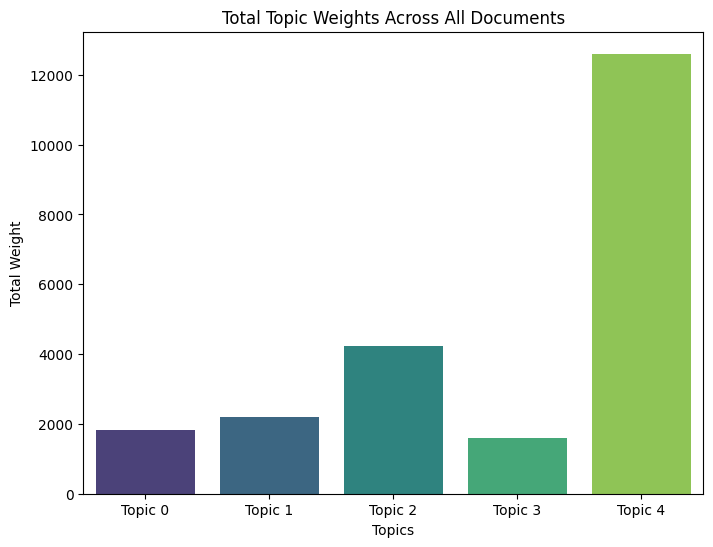

In [ ]:
# Sum topic probabilities for all documents
topic_sums = topic_df_k5.sum(axis=0)

# Plot distribution of topic weights
plt.figure(figsize=(8, 6))
sns.barplot(x=topic_sums.index, y=topic_sums.values, palette="viridis")
plt.title("Total Topic Weights Across All Documents")
plt.xlabel("Topics")
plt.ylabel("Total Weight")
plt.show()


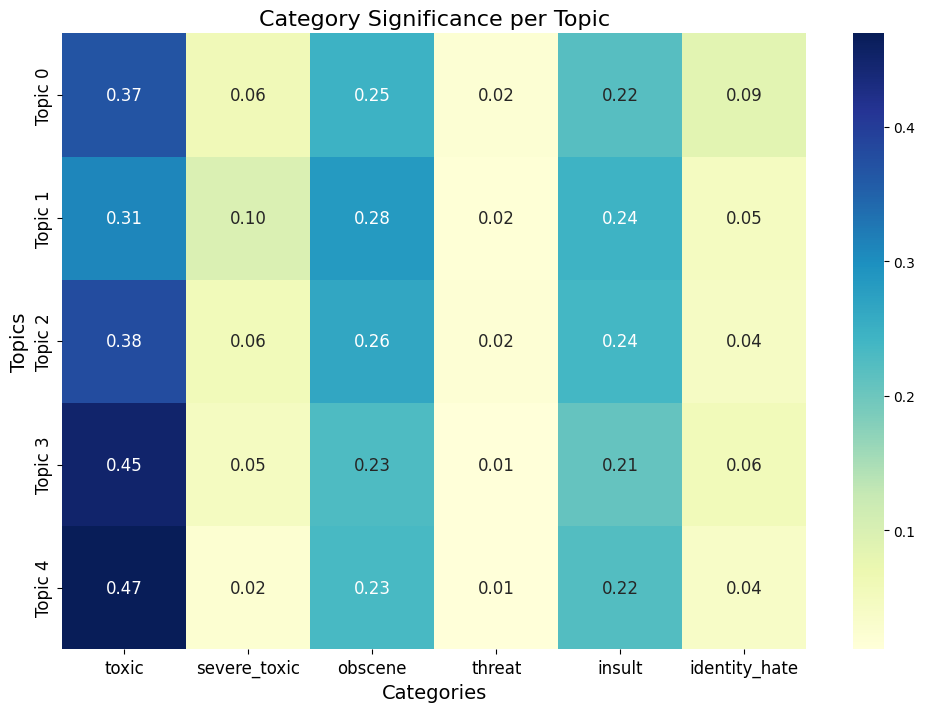

In [ ]:
# Identify the dominant topic for each document
dominant_topic_df = topic_df_k5.idxmax(axis=1)

# Count the number of documents for each category within each topic
category_significance = {}
for topic in topic_df_k5.columns:
    topic_documents = dominant_topic_df[dominant_topic_df == topic].index
    topic_category_counts = toxic_df.loc[topic_documents, categories].sum()
    category_significance[topic] = topic_category_counts

# Convert the counts into a DataFrame
category_significance_df = pd.DataFrame(category_significance).T

# Normalize to get percentages (optional)
category_percentage_df = category_significance_df.div(category_significance_df.sum(axis=1), axis=0)

# Plot the heatmap for category significance
plt.figure(figsize=(12, 8))
sns.heatmap(
    category_percentage_df,
    annot=True,
    cmap="YlGnBu",
    cbar=True,
    fmt=".2f",
    annot_kws={"fontsize": 12}
)

# Add title and labels with customized font sizes
plt.title("Category Significance per Topic", fontsize=16)
plt.xlabel("Categories", fontsize=14)
plt.ylabel("Topics", fontsize=14)

# Adjust ticks font sizes
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Display the plot
plt.show()


In [ ]:
# Show top words for each topic for k=5
print("Top words for each topic (k=5):")
for idx, topic in lda_model_k5.show_topics(formatted=False, num_words=10):
    print(f"Topic {idx}: {[word for word, _ in topic]}")

Top words for each topic (k=5):
Topic 0: ['gay', 'faggot', 'die', 'ass', 'youi', 'sucks', 'sex', 'fag', 'balls', 'must']
Topic 1: ['fuck', 'nigger', 'fucking', 'cunt', 'bitch', 'shit', 'stupid', 'youfuck', 'kill', 'whore']
Topic 2: ['suck', 'u', 'dick', 'little', 'get', 'im', 'c', 'e', 'page', 'like']
Topic 3: ['hate', 'dicks', 'fucking', 'penis', 'fat', 'niggers', 'poop', 'homo', 'jew', 'like']
Topic 4: ['dont', 'like', 'people', 'wikipedia', 'article', 'stupid', 'one', 'youre', 'know', 'think']
